In [9]:
import networkx as nx
import networkx.algorithms.community as nx_comm
from networkx.generators.community import LFR_benchmark_graph
from networkx.algorithms import bipartite
import numpy as np
import scipy as sp
from scipy import sparse
from scipy.sparse import coo_array
from cdlib import algorithms
from cdlib import evaluation
from utils import *
from distances import *
from consensus import *
import math
import itertools
import random
import time
from pathlib import Path
import sklearn
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors

# Create graph

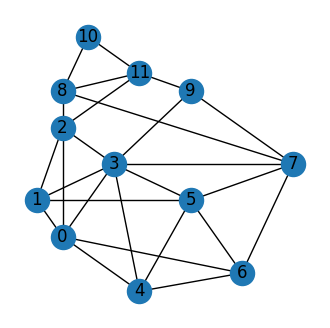

In [2]:
G = nx.Graph()

G.add_nodes_from([0,1,2,3,4,5,6,7,8,9,10,11])

G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3)
G.add_edge(0,4)
G.add_edge(0,6)
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,5)
G.add_edge(2,3)
G.add_edge(2,8)
G.add_edge(2,11)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(3,7)
G.add_edge(3,9)
G.add_edge(4,5)
G.add_edge(4,6)
G.add_edge(5,6)
G.add_edge(5,7)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(7,9)
G.add_edge(8,10)
G.add_edge(8,11)
G.add_edge(9,11)
G.add_edge(10,11)

#pos = nx.spring_layout(G)
pos = {
    0: [1,3],
    1: [0,5],
    2: [1,9],
    3: [3,7],
    4: [4,0],
    5: [6,5],
    6: [8,1],
    7: [10,7],
    8: [1,11],
    9: [6,11],
    10: [2,14],
    11: [4,12]
    
}

fig = plt.figure(figsize=(4, 4)) # To fit in one page when printed
gs = GridSpec(nrows=1, ncols=1)
ax = fig.add_subplot(gs[0,0])

nx.draw(G, pos=pos, ax=ax, with_labels=True)
plt.savefig("toy-graph.pdf")

d = G.from_numpy_array()
d

# Generate different clusterings

louvain 3
[[0, 1, 3, 4, 5, 6], [2, 8, 10, 11], [7, 9]]
cnm 3
[[0, 1, 4, 5, 6], [8, 11, 2, 10], [9, 3, 7]]
labelprop 2
[[0, 1, 2, 3, 4, 5, 6, 7, 9], [8, 10, 11]]
markov 2
[[0, 1, 2, 3, 4, 5, 6, 7, 9], [8, 10, 11]]
walktrap 3
[[0, 1, 2, 3, 4, 5, 6], [8, 10, 11], [7, 9]]


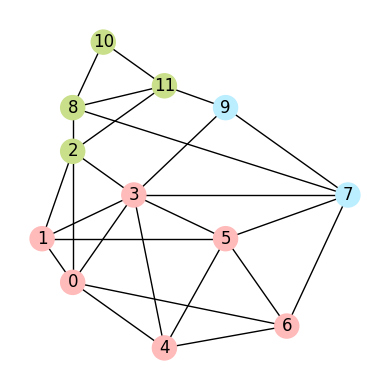

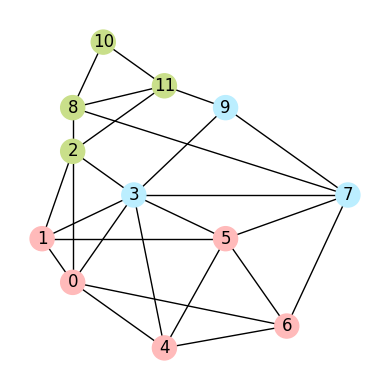

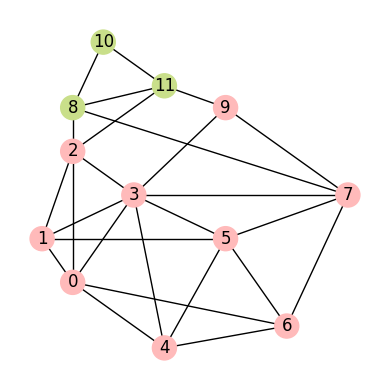

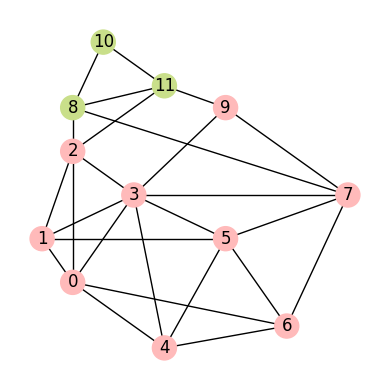

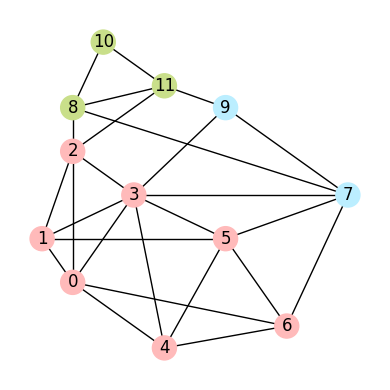

In [3]:
# Colors chosen from https://www.color-hex.com/
YELLOW = "#f9d70b"
ORANGE = "#ff9a00"
BLACK = "#000000"
GRAY = "#999999"
LIGHT_GRAY = "#eeeeee"
LIGHT_RED = "#ffbaba"
RED = "#ff0000"
DARK_RED = "#800000"
LIGHT_BLUE = "#bbeeff"
BLUE = "#0000ff"
DARK_BLUE = "#005b96"
LIGHT_GREEN = "#c9df8a"
GREEN = "#339900"
DARK_GREEN = "#234d20"

colormap = {
    0: LIGHT_RED,
    1: LIGHT_GREEN,
    2: LIGHT_BLUE,
    3: ORANGE,
    4: RED,
    5: GREEN,
    6: BLUE,
    7: YELLOW,
    8: DARK_RED,
    9: DARK_GREEN,
    10: DARK_BLUE,
    11: LIGHT_GRAY 
}

#algs = ["infomap", "louvain", "leiden", "cnm", "label-prop", "markov", "walktrap", "spinglass"]
#algs = ["louvain", "leiden", "cnm", "label-prop", "markov", "walktrap", "spinglass"]
algs = ["louvain", "cnm", "labelprop", "markov", "walktrap"]

P_list = []
for i in range(len(algs)):
    alg = algs[i]
    if alg == "infomap":
        coms = algorithms.infomap(G)
    elif alg == "markov":
        coms = algorithms.markov_clustering(G,inflation=2.0,pruning_threshold=0.01,convergence_check_frequency=100)
    elif alg == "louvain":
        coms = algorithms.louvain(G)
    elif alg == "leiden":
        coms = algorithms.leiden(G)
    elif alg == "labelprop":
        coms = algorithms.label_propagation(G)
    elif alg == "cnm":
        coms = algorithms.greedy_modularity(G)
    elif alg == "walktrap":
        coms = algorithms.walktrap(G)
    elif alg == "spinglass":
        coms = algorithms.spinglass(G)
    print(alg, len(coms.communities))
    print(coms.communities)
    P_list.append({"graph": nx.Graph(G), "partition": list(coms.communities)})
    clust_asn = clust_lst_to_asn(coms.communities)
    node_color = []
    for n in G.nodes():
        node_color.append(colormap[clust_asn[n]])
        
    
    fig = plt.figure(figsize=(4, 4)) # To fit in one page when printed
    gs = GridSpec(nrows=1, ncols=1)
    ax = fig.add_subplot(gs[0,0])
    
    nx.draw(G, pos=pos, ax=ax, with_labels=True, node_color=node_color)
    #ax.set_title(alg)
    plt.tight_layout()
    plt.savefig("toy-graph-"+ alg +".pdf")

In [4]:
P_list

[{'graph': <networkx.classes.graph.Graph at 0x7fb5e045b160>,
  'partition': [[0, 1, 3, 4, 5, 6], [2, 8, 10, 11], [7, 9]]},
 {'graph': <networkx.classes.graph.Graph at 0x7fb5e045b280>,
  'partition': [[0, 1, 4, 5, 6], [8, 11, 2, 10], [9, 3, 7]]},
 {'graph': <networkx.classes.graph.Graph at 0x7fb5ddf0a8c0>,
  'partition': [[0, 1, 2, 3, 4, 5, 6, 7, 9], [8, 10, 11]]},
 {'graph': <networkx.classes.graph.Graph at 0x7fb5ddf0bfd0>,
  'partition': [[0, 1, 2, 3, 4, 5, 6, 7, 9], [8, 10, 11]]},
 {'graph': <networkx.classes.graph.Graph at 0x7fb5ddfc0970>,
  'partition': [[0, 1, 2, 3, 4, 5, 6], [8, 10, 11], [7, 9]]}]

# Generate consensus with `boem`

In [5]:
def boem_consensus(P_list, niter=10, starting_partition=None, verbose=False):
    G = nx.Graph(P_list[0]["graph"])
    n = len(list(G.nodes()))
    k = len(P_list)
    
    row = []
    col = []
    val = []
    for x in P_list:
        graph = x["graph"]
        partition = x["partition"]
        for cluster in partition:
            for i in range(len(cluster)):
                for j in range(i+1, len(cluster)):
                    item_1 = cluster[i]
                    item_2 = cluster[j]
                    row.append(min(int(item_1), int(item_2)))
                    col.append(max(int(item_1), int(item_2)))
                    val.append(int(1))
                    
    r = coo_array((val, (row, col)), shape=(n, n))
    r = r.tocsr()
    R = r.sum()
    if verbose:
        print("R:", R)
    
    rDense = r.toarray() # Should be upper triangular
    rDense = rDense + rDense.T # Making symmetric
    
    K = k - 2 * rDense
    np.fill_diagonal(K, -k) # Adding diagonal entries
    
    refined_partition = None
    if starting_partition:
        refined_partition = list(starting_partition)
    else:
        refined_partition = []
        for i in range(n):
            refined_partition.append([str(i)])
    
    refined_partition_map = clust_lst_to_map(refined_partition)
    
    items = list(refined_partition_map.keys())
    M = np.zeros((n, len(refined_partition)))
    for item_1 in items:
        for partition_id in range(len(refined_partition)):
            for item_2 in refined_partition[partition_id]:
                if(item_1 != item_2):
                    M[int(item_1),partition_id] = M[int(item_1),partition_id] + K[int(item_1), int(item_2)]
    
    mv = np.min(M, axis=1)
    mb = np.argmin(M, axis=1)
    
    count = 0
    it = 1
    while(it <= niter):
        opt_item = items[0]
        opt_deltaS = 0
        opt_a = refined_partition_map[items[0]]
        opt_b = refined_partition_map[items[0]]
        opt_x = int(opt_item)
        for item in items:
            a = refined_partition_map[item]
            x = int(item)
            b = mb[x]
            deltaS = M[x,b] - M[x,a]
            #print("Moving", item, "from", refined_partition[a], "to", refined_partition[b], "results in ", deltaS)
            if deltaS < opt_deltaS:
                opt_item = item
                opt_deltaS = deltaS
                opt_a = a
                opt_b = b
                opt_x = x
        if (opt_deltaS < 0) and (opt_a != opt_b):
            if verbose:
                print("---")
                print("Move Count:", count+1, "Optimum move results in", opt_deltaS)
                print("Move:", opt_item)
                print("From", opt_a, ":", refined_partition[opt_a])
                print("To", opt_b, ":", refined_partition[opt_b])
            for item in items:
                y = int(item)
                if y != opt_x:
                    M[y, opt_a] = M[y, opt_a] - K[y, opt_x]
                    M[y, opt_b] = M[y, opt_b] + K[y, opt_x]
            
            mv = np.min(M, axis=1)
            mb = np.argmin(M, axis=1)
            
            refined_partition[opt_a].remove(opt_item)
            refined_partition[opt_b].append(opt_item)
            refined_partition_map[opt_item] = opt_b
            if verbose:
                print("---")
            
            count = count + 1
        else:
            break

        it = it + 1
    
    empty_clusters = []
    for i in range(len(refined_partition)):
        if len(refined_partition[i]) == 0:
            empty_clusters.append(i)
            
    empty_clusters.sort(reverse=True)
    for e in empty_clusters:
        del refined_partition[e]
        
    G = nx.from_scipy_sparse_array(r)
    
    return {"graph": nx.Graph(G), "partition": list(refined_partition)}

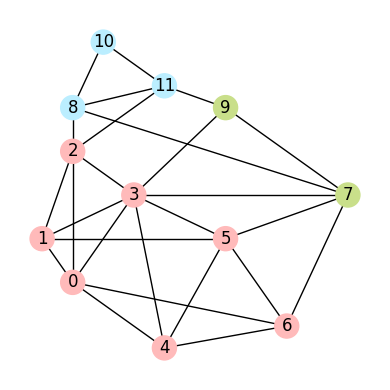

In [6]:
# Colors chosen from https://www.color-hex.com/
YELLOW = "#f9d70b"
ORANGE = "#ff9a00"
BLACK = "#000000"
GRAY = "#999999"
LIGHT_GRAY = "#eeeeee"
LIGHT_RED = "#ffbaba"
RED = "#ff0000"
DARK_RED = "#800000"
LIGHT_BLUE = "#bbeeff"
BLUE = "#0000ff"
DARK_BLUE = "#005b96"
LIGHT_GREEN = "#c9df8a"
GREEN = "#339900"
DARK_GREEN = "#234d20"

colormap = {
    0: LIGHT_RED,
    1: LIGHT_GREEN,
    2: LIGHT_BLUE,
    3: ORANGE,
    4: RED,
    5: GREEN,
    6: BLUE,
    7: YELLOW,
    8: DARK_RED,
    9: DARK_GREEN,
    10: DARK_BLUE,
    11: LIGHT_GRAY 
}

P_star = boem_consensus(P_list, niter=10000, starting_partition = None, verbose=False)
clust_asn = clust_lst_to_asn(P_star["partition"])

node_color = []
for n in G.nodes():
    node_color.append(colormap[clust_asn[n]])

fig = plt.figure(figsize=(4, 4)) # To fit in one page when printed
gs = GridSpec(nrows=1, ncols=1)
ax = fig.add_subplot(gs[0,0])

nx.draw(G, pos=pos, ax=ax, with_labels=True, node_color=node_color)
#ax.set_title(alg)
plt.tight_layout()
plt.savefig("toy-graph-boem.pdf")

# Generate consensus with v8

In [25]:
from scipy.sparse import coo_array
from scipy.sparse import csr_array

# DeltaSOD is calculated following the paper titled "Integrating Microarray Data by Consensus Clustering"
# by Filkov and Skiena
# Assumes the elements of the cluster are named as 0-based indices
# Same as v5 consensus except with following improvements
#    - Calculate Mua only once when a particular vertex u is starting to be considered. 
#      In v5 it was being calculated at every (u,v) pair consideration.
#    - Calculate deltaS only if u and v belong to different clusters in the current solution.
#      That means a and b are different
def v8_consensus(P_list, niter=10, starting_partition=None, verbose=False):
    G = nx.Graph(P_list[0]["graph"])
    n = len(list(G.nodes()))
    k = len(P_list)
    print("Number of edges in G:", len(list(G.edges())))

    t1 = time.time()
    A = nx.to_scipy_sparse_array(G, format="coo")
    t2 = time.time()
    print("Time to get sparse matrix of the graph:", t2-t1)

    nz_rows = A.row 
    nz_cols = A.col
    
    t1 = time.time()
    P_list_asn = []
    c = np.zeros((n,k))
    for i in range(k):
        clust_lst = P_list[i]["partition"]
        clust_asn = clust_lst_to_asn(clust_lst)
        c[:,i] = np.array(clust_asn)
    t2 = time.time()
    print("Time to generate cluster assignment matrix:", t2-t1)
    
    Aw_rows = A.row
    Aw_cols = A.col
    Aw_vals = A.data
    #nz_elems = []
    t1 = time.time()
    for i in range(len(nz_rows)):
        Aw_vals[i] = np.sum( c[nz_rows[i],:] == c[nz_cols[i],:] )
        #nz_elems.append((nz_rows[i], nz_cols[i], Aw_vals[i]))
    #Gw = nx.from_scipy_sparse_array(coo_array((Aw_vals, (Aw_rows, Aw_cols)), shape=(n, n)))
    #nz_elems = sorted(nz_elems, key=lambda x: x[2], reverse=True)
    Aw = csr_array((Aw_vals, (Aw_rows, Aw_cols)), shape=(n, n))
    t2 = time.time()
    print("Time to generate weighted consensus graph:", t2-t1)
    print("Number of non-zeroes in Aw:", Aw.count_nonzero())
    
    t1 = time.time()
    refined_partition = None
    if starting_partition:
        refined_partition = list(starting_partition)
    else:
        refined_partition = []
        for i in range(n):
            refined_partition.append([str(i)])
    
    refined_partition_map = clust_lst_to_map(refined_partition)
    items = list(refined_partition_map.keys())
    t2 = time.time()
    print("Time to initialize:", t2-t1)
    
    tSearch = 0
    tUpdate = 0
    tMovement = 0
    count = 0
    it = 1
    last_valid = np.zeros(n)
    last_deltaS = np.zeros(n)
    while(it <= niter):
        print("---")
        print("Iteration: ", it)
        print("---")
        potential_moves = {
            "from": np.arange(n),
            "to": np.arange(n),
            "attractor": np.arange(n),
            "deltaS": np.zeros(n),
            "valid": np.zeros(n)
        }
        
        # Check all edges and figure out vertices that has different neighboring community other than it's own
        number_of_edges_to_be_probed = 0
        edges_to_be_probed = []
        t1 = time.time()
        for u in range(n):
            row_start = Aw.indptr[u]
            row_end = Aw.indptr [u+1]
            a = refined_partition_map[str(u)]
            edges_to_be_probed.append([])
            for j in range(row_start, row_end):
                v = Aw.indices[j]
                w = Aw.data[j]
                b = refined_partition_map[str(v)]
                if a != b:
                    edges_to_be_probed[u].append( (u, a, v, b, w) )
                    number_of_edges_to_be_probed = number_of_edges_to_be_probed + 1
        t2 = time.time()
        tSearch = tSearch + t2-t1
        print("number_of_edges_to_be_probed:", number_of_edges_to_be_probed)
        print("edges_to_be_probed", edges_to_be_probed)
        
        # Compute Mua for all target u in current iteration
        t1 = time.time()
        Mua = np.zeros(n)
        for u in range(n):
            if len(edges_to_be_probed[u]) > 0:
                a = refined_partition_map[str(u)]
                for elem in refined_partition[a]:
                    if str(elem) != str(u):
                        Mua[u] = Mua[u] + (k - 2 * np.sum( (c[int(u),:] == c[int(elem),:]) ) )
            else:
                pass
        t2 = time.time()
        tSearch = tSearch + t2-t1
        
        print("Mua", Mua)
            
        # Compute Mub for each potential moves and check feasibility with deltaS
        t1 = time.time()
        for u in range(n):
            for potential_move in edges_to_be_probed[u]:
                a = potential_move[1]
                v = potential_move[2]
                w = potential_move[4]
                b = potential_move[3]
                Mub = 0
                for elem in refined_partition[b]:    
                    if str(elem) != str(u):
                        Mub = Mub + (k - 2 * np.sum( (c[int(u),:] == c[int(elem),:]) ) )
                
                deltaS = Mub - Mua[u]

                if (deltaS is not None) and (deltaS < 0) and (deltaS < potential_moves["deltaS"][u]):
                    potential_moves["from"][u] = a
                    potential_moves["to"][u] = b
                    potential_moves["attractor"][u] = v
                    potential_moves["deltaS"][u] = deltaS
                    potential_moves["valid"][u] = 1
                    #break
        t2 = time.time()
        tSearch = tSearch + t2-t1
        
        print("potential_moves before validation:", potential_moves)
        
        t1 = time.time()
        for u in range(n):
            v = potential_moves["attractor"][u]
            if (potential_moves["valid"][u] == 1) and (potential_moves["attractor"][v] == u) and (potential_moves["valid"][v] == 1):
                # Question mark
                if potential_moves["deltaS"][u] < potential_moves["deltaS"][v]:
                    potential_moves["valid"][v] = 0
                    potential_moves["deltaS"][v] = 0
                else:
                    potential_moves["valid"][u] = 0
                    potential_moves["deltaS"][u] = 0
        t2 = time.time()
        tSearch = tSearch + (t2 - t1)
        
        print("potential_moves after validation:", potential_moves)
        
        flag = False
        if np.sum( (potential_moves["valid"] != last_valid) ) == 0:
            # Same set of elements are being moved
            if np.sum(potential_moves["deltaS"]) < np.sum(last_deltaS):
                last_valid = potential_moves["valid"]
                last_deltaS = potential_moves["deltaS"]
                flag = True
        else:
            last_valid = potential_moves["valid"]
            last_deltaS = potential_moves["deltaS"]
            flag = True
        
        if flag == True:
            for u in range(n):
                if potential_moves["valid"][u] == True:
                    a = potential_moves["from"][u]
                    b = potential_moves["to"][u]

                    t1 = time.time()
                    if verbose:
                        print("---")
                        print("Iteration:", it, "Move Count:", count+1, ">> results in deltaS", potential_moves["deltaS"][u])
                        print("Move:", u)
                        print("From partition", a, ":", refined_partition[a])
                        print("To partition", b, ":", refined_partition[b])
                        print("---")
                    refined_partition[a].remove(str(u))
                    refined_partition[b].append(str(u))
                    refined_partition_map[str(u)] = b
                    t2 = time.time()
                    tUpdate = tUpdate + (t2-t1)

                    count = count + 1
                    
        print("refined_partition", refined_partition)
        
        if flag == False:
            break
        
        it = it + 1
    print("Time to search moves:", tSearch)
    print("Time to update M:", tUpdate)
    
    t1 = time.time()
    empty_clusters = []
    for i in range(len(refined_partition)):
        if len(refined_partition[i]) == 0:
            empty_clusters.append(i)
            
    empty_clusters.sort(reverse=True)
    for e in empty_clusters:
        del refined_partition[e]
    t2 = time.time()
    print("Time to delete empty partitions:", t2-t1)
    
    Gw = nx.from_scipy_sparse_array(Aw)
    return {"graph": nx.Graph(Gw), "partition": list(refined_partition)}

Number of edges in G: 26
Time to get sparse matrix of the graph: 0.00020265579223632812
Time to generate cluster assignment matrix: 0.00022029876708984375
Time to generate weighted consensus graph: 0.0004649162292480469
Number of non-zeroes in Aw: 48
Time to initialize: 6.9141387939453125e-06
---
Iteration:  1
---
number_of_edges_to_be_probed: 52
edges_to_be_probed [[(0, 0, 1, 1, 5), (0, 0, 2, 2, 3), (0, 0, 3, 3, 4), (0, 0, 4, 4, 5), (0, 0, 6, 6, 5)], [(1, 1, 0, 0, 5), (1, 1, 2, 2, 3), (1, 1, 3, 3, 4), (1, 1, 5, 5, 5)], [(2, 2, 0, 0, 3), (2, 2, 1, 1, 3), (2, 2, 3, 3, 3), (2, 2, 8, 8, 2), (2, 2, 11, 11, 2)], [(3, 3, 0, 0, 4), (3, 3, 1, 1, 4), (3, 3, 2, 2, 3), (3, 3, 4, 4, 4), (3, 3, 5, 5, 4), (3, 3, 7, 7, 3), (3, 3, 9, 9, 3)], [(4, 4, 0, 0, 5), (4, 4, 3, 3, 4), (4, 4, 5, 5, 5), (4, 4, 6, 6, 5)], [(5, 5, 1, 1, 5), (5, 5, 3, 3, 4), (5, 5, 4, 4, 5), (5, 5, 6, 6, 5), (5, 5, 7, 7, 2)], [(6, 6, 0, 0, 5), (6, 6, 4, 4, 5), (6, 6, 5, 5, 5), (6, 6, 7, 7, 2)], [(7, 7, 3, 3, 3), (7, 7, 5, 5, 2), (7

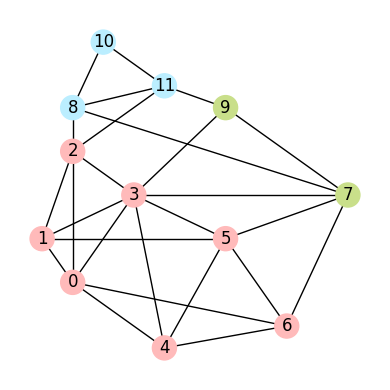

In [26]:
# Colors chosen from https://www.color-hex.com/
YELLOW = "#f9d70b"
ORANGE = "#ff9a00"
BLACK = "#000000"
GRAY = "#999999"
LIGHT_GRAY = "#eeeeee"
LIGHT_RED = "#ffbaba"
RED = "#ff0000"
DARK_RED = "#800000"
LIGHT_BLUE = "#bbeeff"
BLUE = "#0000ff"
DARK_BLUE = "#005b96"
LIGHT_GREEN = "#c9df8a"
GREEN = "#339900"
DARK_GREEN = "#234d20"

colormap = {
    0: LIGHT_RED,
    1: LIGHT_GREEN,
    2: LIGHT_BLUE,
    3: ORANGE,
    4: RED,
    5: GREEN,
    6: BLUE,
    7: YELLOW,
    8: DARK_RED,
    9: DARK_GREEN,
    10: DARK_BLUE,
    11: LIGHT_GRAY 
}

P_star = v8_consensus(P_list, niter=100, starting_partition=None, verbose=False)
clust_asn = clust_lst_to_asn(P_star["partition"])

node_color = []
for n in G.nodes():
    node_color.append(colormap[clust_asn[n]])

fig = plt.figure(figsize=(4, 4)) # To fit in one page when printed
gs = GridSpec(nrows=1, ncols=1)
ax = fig.add_subplot(gs[0,0])

nx.draw(G, pos=pos, ax=ax, with_labels=True, node_color=node_color)
#ax.set_title(alg)
plt.tight_layout()
plt.savefig("toy-graph-v8.pdf")

# Set partition view

In [11]:
"""
# Colors chosen from https://www.color-hex.com/
YELLOW = "#f9d70b"
ORANGE = "#ff9a00"
BLACK = "#000000"
GRAY = "#999999"
LIGHT_GRAY = "#eeeeee"
LIGHT_RED = "#ffbaba"
RED = "#ff0000"
DARK_RED = "#800000"
LIGHT_BLUE = "#bbeeff"
BLUE = "#0000ff"
DARK_BLUE = "#005b96"
LIGHT_GREEN = "#c9df8a"
GREEN = "#339900"
DARK_GREEN = "#234d20"

colormap = {
    0: LIGHT_RED,
    1: LIGHT_GREEN,
    2: LIGHT_BLUE,
    3: ORANGE,
    4: RED,
    5: GREEN,
    6: BLUE,
    7: YELLOW,
    8: DARK_RED,
    9: DARK_GREEN,
    10: DARK_BLUE,
    11: LIGHT_GRAY 
}

#algs = ["infomap", "louvain", "leiden", "cnm", "label-prop", "markov", "walktrap", "spinglass"]
#algs = ["louvain", "leiden", "cnm", "label-prop", "markov", "walktrap", "spinglass"]
algs = ["louvain", "cnm", "labelprop", "markov", "walktrap"]

fig = plt.figure(figsize=(4*len(algs), 4)) # To fit in one page when printed
gs = GridSpec(nrows=1, ncols=len(algs))
axes = []
for i in range(len(algs)):
    axes.append(fig.add_subplot(gs[0,i]))

Gvset = nx.Graph(G)
Gvset.remove_edges_from(G.edges)
for i in range(len(algs)):
    alg = algs[i]
    clust_asn = clust_lst_to_asn(P_list[i]["partition"])
    node_color = []
    for n in Gvset.nodes():
        node_color.append(colormap[clust_asn[n]])
        
    nx.draw(Gvset, pos=pos, ax=axes[i], with_labels=True, node_color=node_color)
    axes[i].set_title("Set Partition: " + str(i+1))
    #axes[i].spines['right'].set_color('0.5')
    
plt.tight_layout()

# https://stackoverflow.com/questions/26084231/draw-a-separator-or-lines-between-subplots
# Get the bounding boxes of the axes including text decorations
r = fig.canvas.get_renderer()
get_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())

print(get_bbox, np.array(axes).flat)
print("---")
print(map(get_bbox, np.array(axes).flat))
print("---")
print(list(map(get_bbox, np.array(axes).flat)))
print("---")
print(np.array(list(map(get_bbox, np.array(axes).flat))))
print("---")
print(np.array(list(map(get_bbox, np.array(axes).flat)), matplotlib.transforms.Bbox))
# print("---")
# print(np.array(list(map(get_bbox, np.array(axes).flat))).reshape(np.array(axes).shape))

# bboxes = np.array(list(map(get_bbox, np.array(axes).flat)), matplotlib.transforms.Bbox).reshape(np.array(axes).shape)
#bboxes = np.array(list(map(get_bbox, np.array(axes).flat)))


# Get the minimum and maximum extent, get the coordinate half-way between those
#ymax = np.array(list(map(lambda b: b.y1, bboxes.flat))).reshape(axes.shape).max(axis=1)
#ymin = np.array(list(map(lambda b: b.y0, bboxes.flat))).reshape(axes.shape).min(axis=1)
#ys = np.c_[ymax[1:], ymin[:-1]].mean(axis=1)

# # Draw a horizontal lines at those coordinates
# for y in ys:
#     line = plt.Line2D([0,1],[y,y], transform=fig.transFigure, color="black")
#     fig.add_artist(line)

plt.savefig("toy-graph-set-partition-view.pdf")
"""

'\n# Colors chosen from https://www.color-hex.com/\nYELLOW = "#f9d70b"\nORANGE = "#ff9a00"\nBLACK = "#000000"\nGRAY = "#999999"\nLIGHT_GRAY = "#eeeeee"\nLIGHT_RED = "#ffbaba"\nRED = "#ff0000"\nDARK_RED = "#800000"\nLIGHT_BLUE = "#bbeeff"\nBLUE = "#0000ff"\nDARK_BLUE = "#005b96"\nLIGHT_GREEN = "#c9df8a"\nGREEN = "#339900"\nDARK_GREEN = "#234d20"\n\ncolormap = {\n    0: LIGHT_RED,\n    1: LIGHT_GREEN,\n    2: LIGHT_BLUE,\n    3: ORANGE,\n    4: RED,\n    5: GREEN,\n    6: BLUE,\n    7: YELLOW,\n    8: DARK_RED,\n    9: DARK_GREEN,\n    10: DARK_BLUE,\n    11: LIGHT_GRAY \n}\n\n#algs = ["infomap", "louvain", "leiden", "cnm", "label-prop", "markov", "walktrap", "spinglass"]\n#algs = ["louvain", "leiden", "cnm", "label-prop", "markov", "walktrap", "spinglass"]\nalgs = ["louvain", "cnm", "labelprop", "markov", "walktrap"]\n\nfig = plt.figure(figsize=(4*len(algs), 4)) # To fit in one page when printed\ngs = GridSpec(nrows=1, ncols=len(algs))\naxes = []\nfor i in range(len(algs)):\n    axes.ap

In [12]:
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans

fig, axes = plt.subplots(3,2, squeeze=False)

for i, ax in enumerate(axes.flat):
    ax.plot([1,2])
    ax.set_title('Title ' + str(i+1))
    ax.set_xlabel('xaxis')
    ax.set_ylabel('yaxis')

# rearange the axes for no overlap
fig.tight_layout()

# Get the bounding boxes of the axes including text decorations
r = fig.canvas.get_renderer()
get_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())
bboxes = np.array(list(map(get_bbox, axes.flat)), mtrans.Bbox).reshape(axes.shape)

#Get the minimum and maximum extent, get the coordinate half-way between those
ymax = np.array(list(map(lambda b: b.y1, bboxes.flat))).reshape(axes.shape).max(axis=1)
ymin = np.array(list(map(lambda b: b.y0, bboxes.flat))).reshape(axes.shape).min(axis=1)
ys = np.c_[ymax[1:], ymin[:-1]].mean(axis=1)

# Draw a horizontal lines at those coordinates
for y in ys:
    line = plt.Line2D([0,1],[y,y], transform=fig.transFigure, color="black")
    fig.add_artist(line)


plt.show()
"""

'\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport matplotlib.transforms as mtrans\n\nfig, axes = plt.subplots(3,2, squeeze=False)\n\nfor i, ax in enumerate(axes.flat):\n    ax.plot([1,2])\n    ax.set_title(\'Title \' + str(i+1))\n    ax.set_xlabel(\'xaxis\')\n    ax.set_ylabel(\'yaxis\')\n\n# rearange the axes for no overlap\nfig.tight_layout()\n\n# Get the bounding boxes of the axes including text decorations\nr = fig.canvas.get_renderer()\nget_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())\nbboxes = np.array(list(map(get_bbox, axes.flat)), mtrans.Bbox).reshape(axes.shape)\n\n#Get the minimum and maximum extent, get the coordinate half-way between those\nymax = np.array(list(map(lambda b: b.y1, bboxes.flat))).reshape(axes.shape).max(axis=1)\nymin = np.array(list(map(lambda b: b.y0, bboxes.flat))).reshape(axes.shape).min(axis=1)\nys = np.c_[ymax[1:], ymin[:-1]].mean(axis=1)\n\n# Draw a horizontal lines at those coordinates\nfor y in ys:\n    

# Generate summary graph

In [13]:
def prep_consensus_graph(P_list):
    G = nx.Graph(P_list[0]["graph"])
    n = len(list(G.nodes()))
    k = len(P_list)
    #print("Number of nodes", n)
    
    row = []
    col = []
    val = []
    for x in P_list:
        graph = x["graph"]
        partition = x["partition"]
        for cluster in partition:
            for i in range(len(cluster)):
                for j in range(i+1, len(cluster)):
                    item_1 = cluster[i]
                    item_2 = cluster[j]
                    row.append(int(item_1))
                    col.append(int(item_2))
                    val.append(int(1))
                    
    r = coo_array((val, (row, col)), shape=(n, n))
    rDense = r.toarray()
    threshold = k / 2
    rDense[np.abs(rDense) < threshold] = 0
    
    G = nx.from_numpy_array(rDense)
    return G

'\nGw = prep_consensus_graph(P_list)\nnodes = []\nedges = []\neweights = []\nfor n in Gw.nodes():\n    nodes.append(n)\n\nfig = plt.figure(figsize=(4, 4)) # To fit in one page when printed\ngs = GridSpec(nrows=1, ncols=1)\nax = fig.add_subplot(gs[0,0])\n\nnx.draw(Gw, pos=pos, ax=ax, with_labels=True)\nplt.savefig("toy-graph-consensus-graph.pdf")\n'

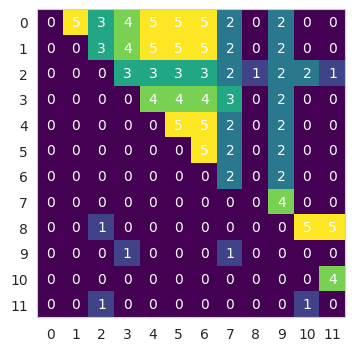

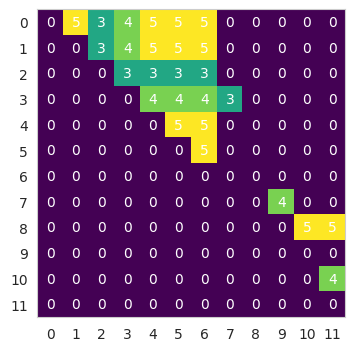

In [24]:
n = len(list(P_list[0]["graph"].nodes()))
k = len(P_list)
#print("Number of nodes", n)
    
row = []
col = []
val = []
for x in P_list:
    graph = x["graph"]
    partition = x["partition"]
    for cluster in partition:
        for i in range(len(cluster)):
            for j in range(i+1, len(cluster)):
                item_1 = cluster[i]
                item_2 = cluster[j]
                row.append(int(item_1))
                col.append(int(item_2))
                val.append(int(1))
                
nodes = []
for i in range(n):
    nodes.append(str(i))
                    
r = coo_array((val, (row, col)), shape=(n, n))
rDense = r.toarray()

fig = plt.figure(figsize=(4, 4)) # To fit in one page when printed
gs = GridSpec(nrows=1, ncols=1)
ax = fig.add_subplot(gs[0,0])
im = ax.imshow(rDense, cmap='viridis')
ax.set_xticks(np.arange(len(nodes)), labels=nodes)
ax.set_yticks(np.arange(len(nodes)), labels=nodes)
ax.grid(False)
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if rDense[i,j] > -1:
            text = ax.text(j, i, rDense[i, j], ha="center", va="center", color="w")
plt.savefig("toy-graph-consensus-matrix-full.pdf")

threshold = k / 2
rDense[np.abs(rDense) < threshold] = 0
fig = plt.figure(figsize=(4, 4)) # To fit in one page when printed
gs = GridSpec(nrows=1, ncols=1)
ax = fig.add_subplot(gs[0,0])
im = ax.imshow(rDense, cmap='viridis')
ax.set_xticks(np.arange(len(nodes)), labels=nodes)
ax.set_yticks(np.arange(len(nodes)), labels=nodes)
ax.grid(False)
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if rDense[i,j] > -1:
            text = ax.text(j, i, rDense[i, j], ha="center", va="center", color="w")
plt.savefig("toy-graph-consensus-matrix-pruned.pdf")

"""
Gw = prep_consensus_graph(P_list)
nodes = []
edges = []
eweights = []
for n in Gw.nodes():
    nodes.append(n)

fig = plt.figure(figsize=(4, 4)) # To fit in one page when printed
gs = GridSpec(nrows=1, ncols=1)
ax = fig.add_subplot(gs[0,0])

nx.draw(Gw, pos=pos, ax=ax, with_labels=True)
plt.savefig("toy-graph-consensus-graph.pdf")
"""

In [16]:
Gw.edges(data=True)

EdgeDataView([(0, 1, {'weight': 5}), (0, 2, {'weight': 3}), (0, 3, {'weight': 4}), (0, 4, {'weight': 5}), (0, 5, {'weight': 5}), (0, 6, {'weight': 5}), (1, 2, {'weight': 3}), (1, 3, {'weight': 4}), (1, 4, {'weight': 5}), (1, 5, {'weight': 5}), (1, 6, {'weight': 5}), (2, 3, {'weight': 3}), (2, 4, {'weight': 3}), (2, 5, {'weight': 3}), (2, 6, {'weight': 3}), (3, 4, {'weight': 4}), (3, 5, {'weight': 4}), (3, 6, {'weight': 4}), (3, 7, {'weight': 3}), (4, 5, {'weight': 5}), (4, 6, {'weight': 5}), (5, 6, {'weight': 5}), (7, 9, {'weight': 4}), (8, 10, {'weight': 5}), (8, 11, {'weight': 5}), (10, 11, {'weight': 4})])

In [17]:
Gw.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))